In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load the dataset
df = pd.read_csv("Online banking model data.csv")  # Update with actual path
# Display basic info
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736848 entries, 0 to 736847
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            736848 non-null  int64  
 1   type            736848 non-null  object 
 2   amount          736848 non-null  float64
 3   nameOrig        736847 non-null  object 
 4   oldbalanceOrg   736847 non-null  float64
 5   newbalanceOrig  736847 non-null  float64
 6   nameDest        736847 non-null  object 
 7   oldbalanceDest  736847 non-null  float64
 8   newbalanceDest  736847 non-null  float64
 9   isFraud         736847 non-null  float64
 10  isFlaggedFraud  736847 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 61.8+ MB
None


In [ ]:
print(df.describe())

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  736848.000000  7.368480e+05   7.368470e+05    7.368470e+05   
mean       19.302760  1.638421e+05   8.753709e+05    8.956310e+05   
std         9.246904  2.696256e+05   2.938818e+06    2.975823e+06   
min         1.000000  1.000000e-01   0.000000e+00    0.000000e+00   
25%        13.000000  1.295395e+04   0.000000e+00    0.000000e+00   
50%        17.000000  7.874358e+04   1.665300e+04    0.000000e+00   
75%        22.000000  2.193005e+05   1.496120e+05    1.902127e+05   
max        38.000000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    7.368470e+05    7.368470e+05  736847.000000        736847.0  
mean     9.811505e+05    1.137452e+06       0.000584             0.0  
std      2.317074e+06    2.459709e+06       0.024150             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00  

In [ ]:
# Define features (X) & target (y)
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Handle NaN values in the target variable (y) before train-test split
# Option 1: Remove rows with NaN values in 'isFraud'
X = X[y.notna()]  # Keep rows in X where y is not NaN
y = y[y.notna()]  # Keep rows in y where y is not NaN

# Option 2: Impute NaN values with a specific value (e.g., 0)
y = y.fillna(0)  # Replace NaN with 0

In [ ]:
# Encode categorical column ('type')
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])  # Converts categories to numbers

# Define features (X) & target (y)
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])  # Drop non-numeric columns
y = df['isFraud']

# Handle NaN values in the target variable (y) before train-test split
# Option 1: Remove rows with NaN values in 'isFraud'
X = X[y.notna()]  # Keep rows in X where y is not NaN
y = y[y.notna()]  # Keep rows in y where y is not NaN
# Option 2: Impute NaN values with a specific value (e.g., 0)
# y = y.fillna(0)  # Replace NaN with 0 # Option 2: Impute NaN with 0 if needed


# Train-test split (80-20 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.isnull().sum())  # Count missing values in each column

# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("🔹 Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

🔹 Logistic Regression Evaluation:
Accuracy: 0.9994367917486598
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147284
         1.0       1.00      0.03      0.07        86

    accuracy                           1.00    147370
   macro avg       1.00      0.52      0.53    147370
weighted avg       1.00      1.00      1.00    147370



In [ ]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree
print("🔹 Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

🔹 Decision Tree Evaluation:
Accuracy: 0.9994367917486598
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147284
         1.0       0.62      0.09      0.16        86

    accuracy                           1.00    147370
   macro avg       0.81      0.55      0.58    147370
weighted avg       1.00      1.00      1.00    147370



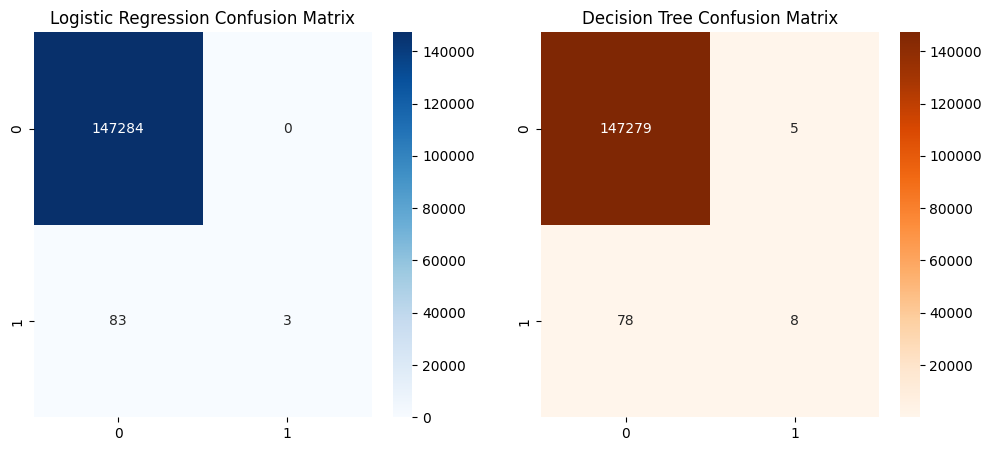

In [ ]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")

plt.show()

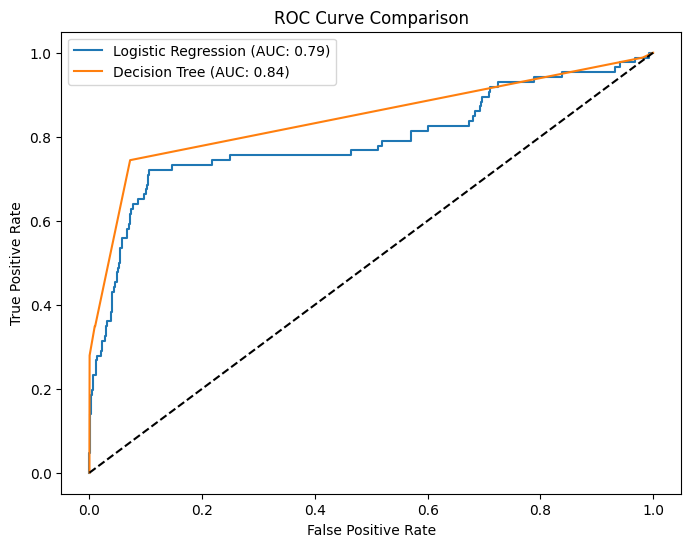

In [ ]:
# ROC Curve & Model Comparison
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:,1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC: {:.2f})".format(auc(fpr_log, tpr_log)))
plt.plot(fpr_tree, tpr_tree, label="Decision Tree (AUC: {:.2f})".format(auc(fpr_tree, tpr_tree)))
plt.plot([0,1], [0,1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()